# Hands-on CSB 2025
## 1. Introduction

This material has been adapted from the paper Vincent Noël, Aurélien Naldi, Laurence Calzone,  Loic Paulevé, and Denis Thieffry. 2025. "Reproducible Boolean model analyses and simulations with the CoLoMoTo software suite: a tutorial". _Interface Focus_. **15**: 20250002. 

Link to the paper: http://doi.org/10.1098/rsfs.2025.0002

Link to the original jupyter notebook: https://dx.doi.org/10.5281/zenodo.15602428. Last edited 22 January 2025.

This jupyter notebook was last edited 26 October 2025.

## 2. Material and methods

### 2.1 Installation

This notebook can be run on a recent personal computer with at least 16 Go of RAM and about 10 Go of available disk space.
The *CoLoMoTo* environment [1] can be installed either as a *Docker* container or as individual *conda* packages.

#### 2.1.1 Installation of CoLoMoTo conda packages
One can rely on *conda* to create a software environment able to reproduce the notebook on *Linux* and *macOS* computers by typing the following commands in a terminal:

```
conda create -n CSB2025 -c colomoto -c potassco -c conda-forge ginsim-python bns-python boolsim-python pymaboss notebook seaborn numpy pandas matplotlib
```

To launch this notebook open in VS Code or type the command:

```
jupyter notebook
```

#### 2.1.2  Installation of the CoLoMoTo Docker container
Alternatively, *Docker* allows packaging a complete pre-installed software environment, so that applications can run consistently across different machines and operating systems. As such, it is well adapted to reproduce complex computational workflows, relying on numerous software.
*Docker* and *Python* need to be pre-installed, go to your folder and then type in a terminal:

```
pip install -U colomoto-docker
colomoto-docker -V 2025-03-01 --bind .
```
More generally, as the versions of package dependencies cannot be fully controlled with *conda*, reproducibility is better ensured by using the *Docker container*.  

### 2.2 Model
The model published by Cohen et al. [2] has been imported and edited with the *GINsim* software [3]. It is publicly available in the GINsim *zginml* model format (including the layout, to be open with *GINsim*, version ≥ 3.0), as well as in the *SBML-qual* format [4], in the *GINsim* model repository (http://ginsim.org/). 

## 3. Overview

The following sections of notebook cover the following analyses:

* Loading of the packages required for the tutorial
* Loading of the model and visualisation of the network with *GINsim*.
* Stochastic simulations of the wild type model with *MaBoSS*.
* Stochatic dynamical simulations of mutants with *MaBoSS*.

### 3.1 Loading required packages
Before running the analyses, the packages to be used need to be loaded. For this tutorial, only the necessary CoLoMoTo packages are selected. 
The other packages listed here can be loaded according to the instructions provided at https://colomoto.github.io/colomoto-docker/.   
Note that these packages can also be loaded later on, just before their use.

In [ ]:
# %%time
import numpy as np
import pandas as pd
import seaborn as sns
import ginsim 
import biolqm 
import maboss
# import bns
# import boolsim
from colomoto_jupyter import tabulate # for fixpoint table display
import matplotlib.pyplot as plt # for modifying plots
import os

## Hands-on 1: GINsim
### 3.2 Loading and Visualisation of the model with GINsim

To load the model and visualise its regulatory graph, we run the following code cell:

In [ ]:
# Loading and visualisation of the model
model_ginsim = ginsim.load("./models/Metastasis_Master_Model.zginml")

ginsim.show(model_ginsim)

### 3.3 Attractor analysis with *bioLQM*

Attractors represent the long-term (asymptotic) behaviours of the model. In the case of Boolean models, attractors can correspond to stable states (with all components frozen at level 0 or 1) or to periodic/cyclic behaviour (with a subset of components switching between values 0 or 1).  Attractors are often associated with cellular phenotypes, cell fates (e.g. cell proliferation or cell death), or cellular types in the case of cell differentiation models. Their analysis allows the modeller to verify that the model reproduces the dynamical properties expected for the biological system in normal or perturbed conditions. 

To obtain a first overview of the asymptotic properties of the model, we can use the software tool *bioLQM* [5], which includes an efficient algorithm to identify all stable states, regardless of their reachability [6].

We first need to convert our model in the biolqm format.

In [ ]:
# conversion of the model for biolqm
model_biolqm = ginsim.to_biolqm(model_ginsim)

Using *bioLQM*, the stable states of the model can be computed in the following code cell.   
They correspond to long-term solutions of the model.

In [ ]:
# Compute fixpoints
fps = biolqm.fixpoints(model_biolqm)
print(len(fps), "fixpoints") # shows the number of fixpoints
tabulate(fps) # table displaying all the fixpoints

*bioLQM* returns eight *stable states* (also called *fixed points*).  

To better visualise any of these stable states, the corresponding values can be projected on the model regulatory graph with a simple code line, using *GINsim*. Such a visualisation highlights the pathways/modules that are active in one particular stable state. An example of such stable state projection is provided in the following figure.

In [ ]:
# visualising the first fixed point from the table above.
ginsim.show(model_ginsim,fps[5])

Here we have projected the first stable stated reported in the table above. Inactivated nodes (value 0) are shown in white, while activated nodes (value 1) are shown in blue.

### Task 1: Look into the PKN model

This model was described and studied in this work: Traynard, P., Tobalina, L., Eduati, F., Calzone, L., & Saez-Rodriguez, J. (2017). Logic Modeling in Quantitative Systems Pharmacology. CPT: Pharmacometrics & Systems Pharmacology. https://doi.org/10.1002/psp4.12225

1, Find the stable states of the PKN model
2, Explain what is the cause that the model has active caspases in the Survival stable state

## Hands-on 2: MaBoSS
### 3.4 Using MaBoSS software to perform stochastic simulations of the wild type model

It is difficult to build the asynchronous state transition graph and analyse the transient dynamics of such complex models. To cope with this issue, we use MaBoSS, a tool performing stochastic simulations over Boolean networks based on the continuous-time Markov chain formalism, relying on the Gillespie algorithm [7, 8]. The software enables the generation of time plots showing the evolution of mean component values (or patterns thereof) and pie charts showing the probabilities of the different model states reached at the end of the simulation.

The biolqm model can be converted into the format required by MaBoSS using *bioLQM*.

In [ ]:
# Conversion of bioLQM model into the MaBoSS format
model_maboss = biolqm.to_maboss(model_biolqm)

After loading the model, simulation parameters can be modified.

In [ ]:
# Delineation of MaBoSS simulation parameters
model_maboss.update_parameters(sample_count=5000,max_time=200, time_tick=0.5)

This command line defines the following simulation parameters:
- Number of simulations: 5000.
- Maximum length of the simulation (in arbitrary unit): 200.
- Interval between two time points: 0.5.

Note that MaBoSS uses continuous-time Boolean modeling and requires the specification of a maximum simulation length and an interval between time points.
All the stochastic simulations reported in the notebook use these same simulation parameters.

Next, we define a wild-type version of the model, called *WT*, and we select the *external variables*, i.e. the variables for which the values will be reported during the simulation. 
This is crucial to avoid combinatorial explosion.

In [ ]:
WT = model_maboss.copy()
## Select outputs for visualization of the results
WT.network.set_output(('CellCycleArrest','Metastasis','Migration','Invasion','Apoptosis','EMT'))

Note that when exporting a model to MaBoSS with bioLQM or GINsim, all the initial values are set to 0 by default.  
Hereafter, we assign to the model to the initial conditions defined by Cohen et al.

In [ ]:
init_active = {'ECMicroenv', 'GF'}
# dict-like representation, associating a node to either 0 or 1
init = {n: 1 if n in init_active else 0 for n in map(str, model_biolqm.getComponents())}

In [ ]:
# Define a state corresponding to initial conditions
active_init = [ k for (k,v) in init.items() if v==1 ]
maboss.set_nodes_istate(WT, active_init, [0,1])

MaBoSS simulation results can be graphically displayed as *time plots* showing the probabilities of active nodes or model states (vectors of active nodes) over time, or as *pie charts* showing the probabilities of the final states (i.e., the states reached at the end of the simulations). In brief, the trajectories plotted on these graphs represent mean trajectories of 5000 single trajectories focusing on a subset of seven selected nodes. It is possible to visualise the activity of each of these nodes over time , or the evolution of model states defined as configurations of active nodes, which can also be displayed as a pie chart for the last time point considered. 


In [ ]:
# Run a MaBoSS simulation
run_WT = WT.run()

In [ ]:
# Plot the trajectories of the WT simulation for selected nodes
run_WT.get_nodes_probtraj().plot(legend=True)
plt.title('WT node trajectories')
## Note that the model state <nil> means that none of the external variables are ON.

# Plot the trajectories of the WT simulation with model states
run_WT.plot_trajectory(legend=True)
plt.title('WT model state trajectories')

# Plot pie chart
run_WT.plot_piechart()
plt.title('Repartition of final WT model states')

It is also  possible to plot the **state entropy** (H) and the **transition entropy** (TH) over time, which can be interpreted as signatures for the stable states or cyclic attractors. These curves provide a means to check the nature of the attractors of the model. Entropy measures the “disorder” of the system studied. A very low transition entropy at the end of a simulation thus suggests that the system has reached an equilibrium, while a positive state entropy may suggest the existence of a cyclic attractor or the occurrence of multiple stable states (for more details, see [7]).

In [ ]:
# Plot the state and transition entropy curves
run_WT.plot_entropy_trajectory()
plt.title('WT entropy curves')

In [ ]:
run_WT.save("Metastasis_WT")  # saves the MaBoSS model and simulation parameters

The state entropy initially rises abruptly, and later slowly decreases.
In parallel, the transition entropy curve displays a little peak before remaining close to zero, with some noise.

Together, these two curves are suggestive of a a transient periodic behaviour, which ultimately collapses as more and more cells trigger apoptosis.

### 3.5 Using MaBoSS software to change initial conditions of the wild type model

Next, we can use *MaBoSS* to study the impact of changes in the initial conditions on the dynamic behaviour of the model. In the preceding simulation, all death signals were initially OFF. Hereafter, we assess the effect of activating DNAdamage, a ligand initiating the death pathways, while keeping the rest of the other initial conditions unchanged. Note that DNAdamage is an input of the death module, and thus not regulated. Such inputs are set either to 0 or 1 in the initial conditions, thereby conveying the status of the environment.

The following code cells defines a copy of the WT model, triggers DNAdamage level to 1 at the initial state, performs the simulation, and finally displays the results:

In [ ]:
# Copy the WT model and change the value of Trail at the initial state
WT_death = WT.copy()
maboss.set_nodes_istate(WT_death, ["DNAdamage" ] + active_init, [0,1])

In [ ]:
# %%time
# We repeat the MaBoSS simulations using the modified initial conditions.
# Run a MaBoSS simulation
WT_death.update_parameters(sample_count=5000,max_time=200, time_tick=0.5)
run_WT_death = WT_death.run()

In [ ]:
# Plot the results for the WT model with dead signal ON
# Plot the WT node trajectories with dead signal ON
#run_WT_death.plot_trajectory(legend=False)
run_WT_death.get_nodes_probtraj().plot(legend=True)
plt.title('WT node trajectories death signal ON')
# Plot the WT model state trajectories with dead signal ON
run_WT_death.plot_trajectory(legend=True)
plt.title('WT model state trajectories with death signal ON')
# Plot WT pie chart with dead signal ON
run_WT_death.plot_piechart(legend=True)
plt.title('Repartition of final states for the WT model with death signal ON')
# Plot the WT state and transition entropy curves with dead signal ON
run_WT_death.plot_entropy_trajectory()
plt.title('Entropy curves for WT model with dead signal ON')

In [ ]:
run_WT_death.save("Metastasis_WT_Death")  # saves the MaBoSS model and simulation parameters

The activation of DNAdamage at the initial state enables the apoptotic fate. In parallel, the state entropy drops much faster, while the transition entropy stabilises around zero, suggesting a stable state situation.

### Task 2: Studying the PKN model


In [ ]:
# 1, Load the PKN model
# model_ginsim_PKN = ginsim.load("./models/PKN.zginml")
# 2, Define outputs for the PKN model
# ('MYC','Cell_cycle','Survival','Caspase8','Caspase9')
# 3, Define initial conditions
# Set a first test with {'TNFa', 'EGF', 'IL6', 'IGF_1', 'DHT', 'Stress'} to 50% active
# Hint: you need to use maboss.set_nodes_istate(WT_PKN, active_init, [0.5,0.5])
# Set a second test with only {'EGF'} full active
# Set a third test with only {'Stress'} full active
# 4, Run the simulations and plot the results (trajectories and pie chart)
# 5, Analyse and compare the results of the different simulations.
# Hint: you can follow the example of the WT model simulation above.

## Hands-on 3: Mutant analysis with MaBoSS 
### 3.5 Mutant simulations with MaBoSS

Hereafter, we focus on the analysis of the impact of the perturbation of other model components, using the *MaBoSS* software as presented in Cohen et al paper.

Such perturbations can be understood as mutations that patients bear, or as targets of drugs that would suppress proliferation or increase apoptosis.

#### 3.5.1 Stochastic simulation of WT activity with random initial conditions

In [ ]:
init_active = {'ECMicroenv', 'GF'}
# dict-like representation, associating a node to either 0 or 1
init = {n: 1 if n in init_active else 0 for n in map(str, model_biolqm.getComponents())}
active_init = [ k for (k,v) in init.items() if v==1 ]
maboss.set_nodes_istate(WT, active_init, [0.5, 0.5])

In [ ]:
res_WT_random = WT.run()
# Plot the time plot and pie chart for NICD ectopic activity
res_WT_random.get_nodes_probtraj().plot(legend=True)
plt.title(' Node trajectories for WT_random activity')
res_WT_random.plot_piechart()
plt.title('Repartition of final model states for WT_random activity')

#### 3.5.2 Stochastic simulation of ectopic Notch activity

In [ ]:
# MaBoSS simulation for NICD ectopic activity
mut_NICD_ON = WT.copy()
mut_NICD_ON.mutate("NICD", "ON")
mutres_NICD_ON = mut_NICD_ON.run()

In [ ]:
# Plot the time plot and pie chart for NICD ectopic activity
mutres_NICD_ON.get_nodes_probtraj().plot(legend=True)
plt.title(' Node trajectories for NICD ectopic activity')
mutres_NICD_ON.plot_piechart()
plt.title('Repartition of final model states for NICD ectopic activity')

#### 3.5.3. Stochastic simulation of p53 knockdown

In [ ]:
# %%time
# MaBoSS simulation for Casp8 knockdown
mut_p53_OFF = WT.copy()
mut_p53_OFF.mutate("p53", "OFF")
mutres_p53_OFF = mut_p53_OFF.run()

In [ ]:
# #Plot the time plot and pie chart for Casp8 ectopic activity
mutres_p53_OFF.get_nodes_probtraj().plot(legend=True)
plt.title('Node trajectories for p53 knockdown')
mutres_p53_OFF.plot_piechart(legend=True)
plt.title('Repartition of final states for the p53 knockdown model')

#### 3.5.4. Multiple mutant simulations

In [ ]:
mut_NICD_p53 = WT.copy()
mut_NICD_p53.mutate("NICD", "ON")
mut_NICD_p53.mutate("p53", "OFF")
mutres_NICD_p53 = mut_NICD_p53.run()

In [ ]:
# Plot the time plot and pie chart for NICD ectopic activity
mutres_NICD_p53.get_nodes_probtraj().plot(legend=True)
plt.title(' Node trajectories for NICD ectopic and p53 KO activity')
mutres_NICD_p53.plot_piechart()
plt.title('Repartition of final model states for NICD ectopic and p53 KO activity')

Compare this to Figure 3 of the Cohen et al paper

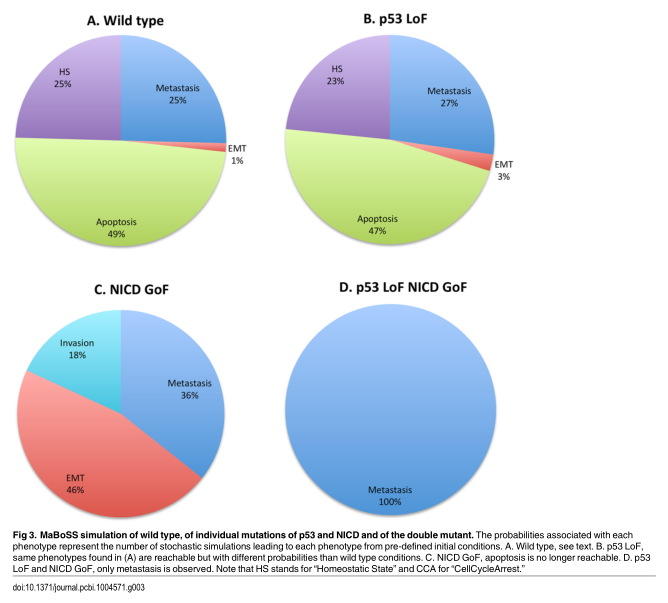
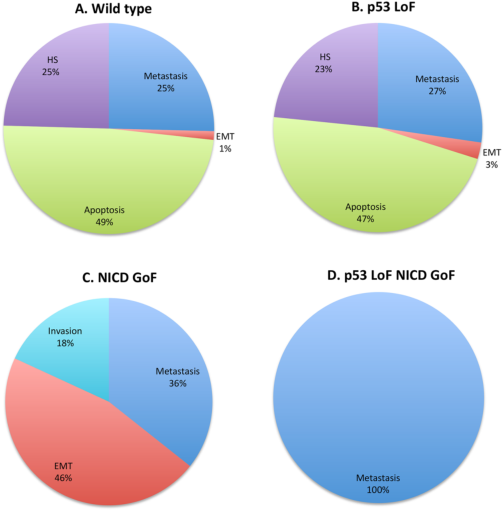

### Task 3: Simulate mutants on the PKN model

In [ ]:
# 1, Copy the PKN model
# model_maboss_PKN
# 2, Define outputs for the PKN model
# ('MYC','Cell_cycle','Survival','Caspase8','Caspase9')
# 3, Simulate PI3K KO with random initial conditions
# {'TNFa', 'EGF', 'IL6', 'IGF_1', 'DHT', 'Stress'} to 50% active
# Hint: you need to use maboss.set_nodes_istate(WT_PKN, active_init, [0.5,0.5])
# 4, Simulate mTOR KO with random initial conditions
# 5, Simulate DHT initial state to 1.
# 6, Simulate the combination of PI3K KO and DHT initial state to 1.
# 7, Run the simulations and plot the results (trajectories and pie chart)
# 8, Analyse and compare the results of the different simulations and with Table 1 of Traynard et al., 2017.
# Hint: you can follow the example of the previous Task 2 above.

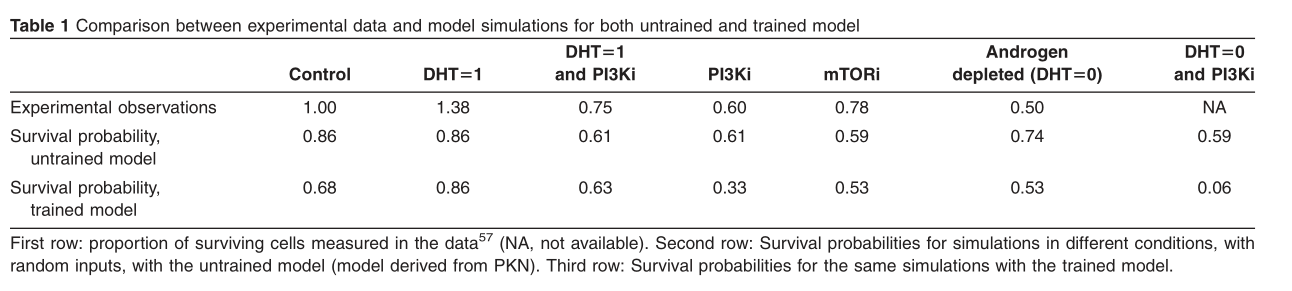

## References
1. Naldi A, Hernandez C, Levy N, Stoll G, Monteiro PT, Chaouiya C, Helikar T, Zinovyev A, Calzone L, Cohen-Boulakia S, Thieffry D, Paulevé L. The CoLoMoTo active Notebook: Accessible and Reproducible Computational Analyses for Qualitative Biological Networks.  Front Physiol 2018; 9: 680. ([doi:10.3389/fphys.2018.00680](https://doi.org/10.3389/fphys.2018.00680))
1. Cohen, D. P. A., Martignetti, L., Robine, S., Barillot, E., Zinovyev, A., & Calzone, L. (2015). Mathematical Modelling of Molecular Pathways Enabling Tumour Cell Invasion and Migration. PLoS Comput Biol, 11(11), e1004571. https://doi.org/10.1371/journal.pcbi.1004571
1. Naldi A, Hernandez C, Abou-Jaoudé W, Monteiro PT, Chaouiya C, Thieffry D. Logical modelling and analysis of cellular regulatory networks with GINsim 3.0. Front Physiol 2018; 9: 646. ([doi:10.3389/fphys.2018.00646](https://doi.org/10.3389/fphys.2018.00646))
1. Chaouiya C, Berenguier D, Keating SK, Naldi A, van Iersel MP, Rodriguez N, Dräger A, Büchel F, Cokelaer T, Kowal B, Wicks B, Gonçalves E, Dorier J, Page onteiro PT, von Kamp A, Xenarios I, de Jong H, Hucka M, Klamt S, Thieffry D, Le Novère N, Saez-Rodriguez J, Helikar T. SBML qualitative models: a model repr ation format and infrastructure to foster interactions between qualitative modelling formalisms and tools. BMC Syst Biol 2013; 7: 135. ([doi:10.1186/1752-05 135](https://doi.org/10.1186/1752-0509-7-135))
1. Naldi A. BioLQM: A Java Toolkit for the Manipulation and Conversion of Logical Qualitative Models of Biological Networks. Front Physiol 2018; 9: 1605. ([doi:10.3389/fphys.2018.01605](https://doi.org/10.3389/fphys.2018.01605))
1. Naldi A, Remy E, Thieffry D, Chaouiya C. Dynamically consistent reduction of logical regulatory graphs. Theor Comput Sci 2011; 412: 2207-2218. ([doi:10.1016/j.tcs.2010.10.021](https://doi.org/10.1016/j.tcs.2010.10.021))

1. Stoll G., Viara E., Barillot E., Calzone L. Continuous time boolean modeling for biological signaling: application of Gillespie algorithm. BMC Syst Biol 2012, 6: 116. ([doi:10.1186/1752-0509-6-116](https://doi.org/10.1186/1752-0509-6-116)).
1. Stoll G, Caron B, Viara E, Dugourd A, Zinovyev A, Naldi A, Kroemer G, Barillot E, Calzone L. MaBoSS 2.0: an environment for stochastic Boolean modeling. Bioinformatics 2017; 33: 2226-2228. ([doi:10.1093/bioinformatics/btx123](https://doi.org/10.1093/bioinformatics/btx123)).